In [1]:
from scipy.stats import beta
import scipy.special as sp
import numpy as np
from pymittagleffler import mittag_leffler
from scipy.special import roots_jacobi
import matplotlib.pyplot as plt

In [2]:
class exp:
    def __init__(self, lam) -> None:
        self.lam = lam 
    def __call__(self, t):
        return np.exp(self.lam*t) 
    def grad(self, t, al):
        lam = self.lam
        if 1<al<2:
            return np.real(lam**2*t**(2-al)*mittag_leffler(lam*t,1,3-al))
        elif al==1:
            return self.lam*np.exp(lam*t)
        elif al==2:
            return self.lam**2*np.exp(lam*t)

In [3]:
t = 1.5
lam = -1
f = exp(lam)
alpha = 1.5
dfal_true = f.grad(t, alpha)
coeff = sp.gamma(2-alpha) 
coeff = sp.gamma(2-alpha) 
MC=10000
MG=100
taus = beta.rvs(2-alpha,1,size=MC)
quad_t, quad_wt = roots_jacobi(MG, 0, 1-alpha)
quad_t2 = (quad_t + 1) / 2
quad_wt2 = quad_wt * (1 / 2) ** (alpha-1)

In [ ]:
# MC-I
epsilon = 1e-10

taus_max = np.maximum(taus,epsilon/t)
part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)/(2-alpha)*t**(2-alpha)*np.mean((f.grad(t,1.0)-f.grad(t-t*taus,1.0))/(t*taus_max))
MCI = part1/coeff
MCI-dfal_true

In [ ]:
#GJ-I
part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)*t**(2-alpha)*2**(alpha-1)*np.sum(quad_wt*(f.grad(t,1.0)-f.grad(t-t*(quad_t+1)/2,1.0))/((quad_t+1)*t))
GJI = part1/coeff
GJI-dfal_true

In [ ]:
# MC-II
epsilon = 1e-6
taus_max = np.maximum(taus,epsilon/t)
part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
part2 = -(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
part3 = -(alpha-1)*alpha/(2-alpha)*t**(2-alpha)*np.mean((f(t)-f(t-t*taus)-t*taus*f.grad(t,1.0))/(t*taus_max)**2)
MCII = (part1+part2+part3)/coeff
MCII-dfal_true

In [ ]:
# GJ-II
part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
part2 =-(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
part3 = -(alpha-1)*alpha*t**(2-alpha)*2**(alpha-2)*np.sum(quad_wt*(f(t)-f(t-t*quad_t2)-t*quad_t2*f.grad(t,1.0))/(t*quad_t2)**2)
GJII = (part1+part2+part3)/coeff
(GJII-dfal_true)/dfal_true

In [4]:
# test with different alphas 
t = 1.5
lam = -1
f = exp(lam)
MC=10000
MG=100
alphas = np.linspace(1.01,1.99,100)
MCI = np.zeros_like(alphas)
MCII = np.zeros_like(alphas)
GJI = np.zeros_like(alphas)
GJII = np.zeros_like(alphas)
dfal = np.zeros_like(alphas)

In [10]:
for i,alpha in enumerate(alphas):
    dfal[i] = f.grad(t, alpha)
    coeff = sp.gamma(2-alpha) 
    taus = beta.rvs(2-alpha,1,size=MC)
    quad_t, quad_wt = roots_jacobi(MG, 0, 1-alpha)
    quad_t2 = (quad_t + 1) / 2
    quad_wt2 = quad_wt * (1 / 2) ** (2-alpha)

    epsilon = 1e-16
    taus_max = np.maximum(taus,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)/(2-alpha)*t**(2-alpha)*np.mean((f.grad(t,1.0)-f.grad(t-t*taus,1.0))/(t*taus_max))
    MCI[i] = part1/coeff
    
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)*t**(2-alpha)*2**(alpha-1)*np.sum(quad_wt*(f.grad(t,1.0)-f.grad(t-t*(quad_t+1)/2,1.0))/((quad_t+1)*t))
    GJI[i] = part1/coeff

    epsilon = 1e-7
    taus_max = np.maximum(taus,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
    part2 = -(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
    part3 = -(alpha-1)*alpha/(2-alpha)*t**(2-alpha)*np.mean((f(t)-f(t-t*taus)-t*taus*f.grad(t,1.0))/(t*taus_max)**2)
    MCII[i] = (part1+part2+part3)/coeff

    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
    part2 =-(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
    part3 = -(alpha-1)*alpha*t**(2-alpha)*np.sum(quad_wt2*(f(t)-f(t-t*quad_t2)-t*quad_t2*f.grad(t,1.0))/(t*quad_t2)**2)
    GJII[i] = (part1+part2+part3)/coeff

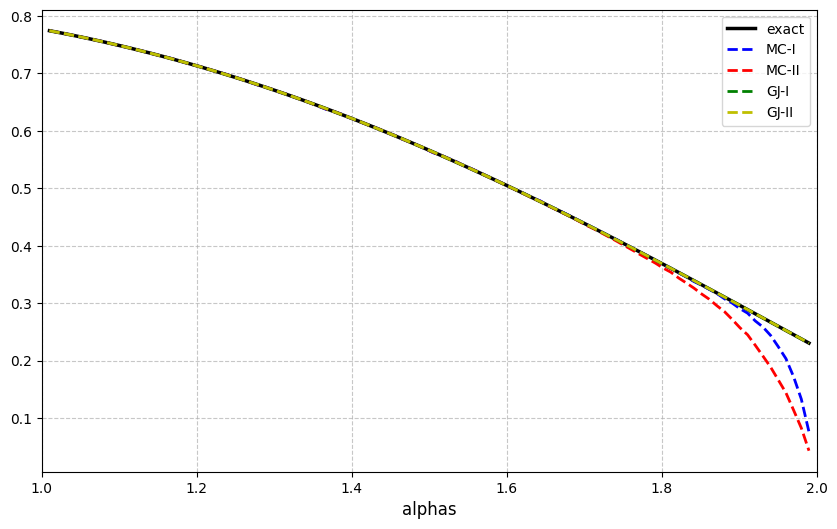

In [11]:
plt.figure(figsize=(10, 6))  # 增大图表尺寸
plt.plot(alphas, dfal, linewidth=2.5, label='exact', color='black')  # 加粗exact线条并使用黑色
plt.plot(alphas, MCI, 'b--', linewidth=2, label='MC-I')  # 增加其他线条宽度
plt.plot(alphas, MCII, 'r--', linewidth=2, label='MC-II')
plt.plot(alphas, GJI, 'g--', linewidth=2, label='GJ-I')
plt.plot(alphas, GJII, 'y--', linewidth=2, label='GJ-II')
plt.xlabel(r'alphas', fontsize=12)  # 增大标签字体
plt.legend(fontsize=10)  # 增大图例字体
plt.grid(True, linestyle='--', alpha=0.7)  # 使网格线更细致
plt.xlim(1.0, 2.0)
plt.box(True)
plt.show()

C:\Users\zenki\AppData\Local\Temp\ipykernel_30740\1167551939.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-16, 0.0)


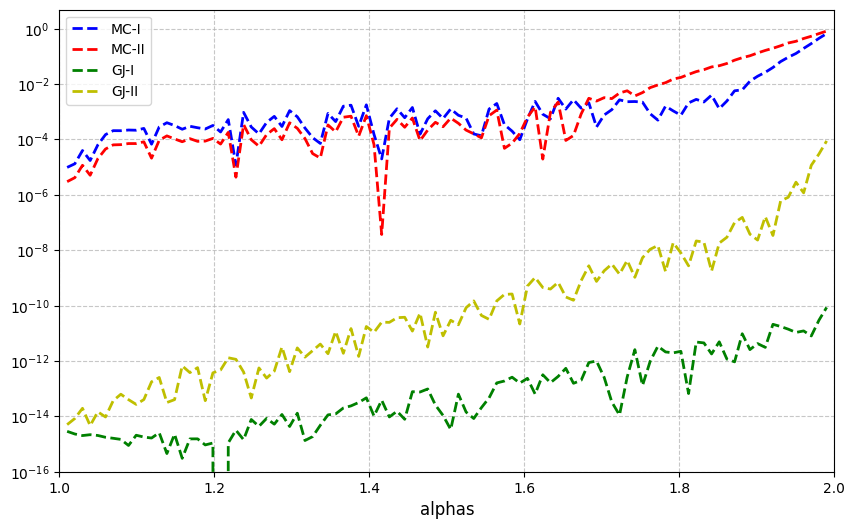

In [7]:
plt.figure(figsize=(10, 6))  # 增大图表尺寸
# plt.plot(alphas, dfal, linewidth=2.5, label='exact', color='black')  # 加粗exact线条并使用黑色
plt.semilogy(alphas, abs((MCI-dfal)/dfal), 'b--', linewidth=2, label='MC-I')  # 增加其他线条宽度
plt.semilogy(alphas, abs((MCII-dfal)/dfal), 'r--', linewidth=2, label='MC-II')
plt.semilogy(alphas, abs((GJI-dfal)/dfal), 'g--', linewidth=2, label='GJ-I')
plt.semilogy(alphas, abs((GJII-dfal)/dfal), 'y--', linewidth=2, label='GJ-II')
plt.xlabel(r'alphas', fontsize=12)  # 增大标签字体
plt.legend(fontsize=10)  # 增大图例字体
plt.grid(True, linestyle='--', alpha=0.7)  # 使网格线更细致
plt.xlim(1.0, 2.0)
plt.ylim(1e-16, 0.0)
plt.box(True)
plt.show()

#### different M

In [3]:
from scipy.stats import beta
import scipy.special as sp
import numpy as np
from pymittagleffler import mittag_leffler
from scipy.special import roots_jacobi
import matplotlib.pyplot as plt

In [10]:
# test with different nums
t = 1.5
lam = -1.0
f = exp(lam)
# M_MC = [10,20,40,80,160,320,640,1280,2560,5120,10240]
# M_GJ = [10,20,40,80,160,320,640,1280,2560,5120,10240]
Ms = np.array([10,20,40,80,160,320,640,1280,2560,5120,10240])
alpha=1.50
MCI = []
MCII = []
GJI = []
GJII = []
dfal = f.grad(t, alpha)
coeff = sp.gamma(2-alpha) 

In [11]:
for i,M in enumerate(Ms):
    coeff = sp.gamma(2-alpha)
    taus = beta.rvs(2-alpha,1,size=M)
    quad_t, quad_wt = roots_jacobi(M, 0, 1-alpha)
    quad_t2 = (quad_t + 1) / 2
    quad_wt2 = quad_wt * (1 / 2) ** (alpha-1)

    epsilon = 1e-10
    taus_max = np.maximum(taus,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)/(2-alpha)*t**(2-alpha)*np.mean((f.grad(t,1.0)-f.grad(t-t*taus,1.0))/(t*taus_max))
    MCI.append(part1/coeff)
    
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)*t**(2-alpha)*2**(alpha-1)*np.sum(quad_wt*(f.grad(t,1.0)-f.grad(t-t*(quad_t+1)/2,1.0))/((quad_t+1)*t))
    GJI.append(part1/coeff)

    epsilon = 1e-7
    taus_max = np.maximum(taus,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
    part2 = -(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
    part3 = -(alpha-1)*alpha/(2-alpha)*t**(2-alpha)*np.mean((f(t)-f(t-t*taus)-t*taus*f.grad(t,1.0))/(t*taus_max)**2)
    MCII.append((part1+part2+part3)/coeff)

    epsilon=1e-10
    ind = quad_t2>epsilon/t   
    quad_t2 = quad_t2[ind]
    quad_wt = quad_wt[ind]
    # quad_t2_max = np.maximum(quad_t2,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
    part2 =-(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
    part3 = -(alpha-1)*alpha*t**(2-alpha)*2**(alpha-2)*np.sum(quad_wt*(f(t)-f(t-t*quad_t2)-t*quad_t2*f.grad(t,1.0))/(t*quad_t2)**2)
    GJII.append((part1+part2+part3)/coeff)

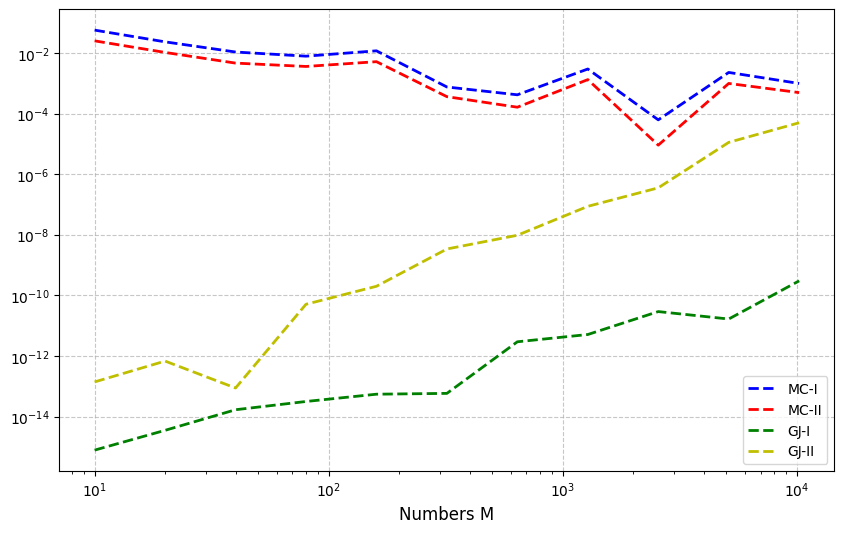

In [12]:
plt.figure(figsize=(10, 6))  # 增大图表尺寸
# plt.plot(alphas, dfal, linewidth=2.5, label='exact', color='black')  # 加粗exact线条并使用黑色
plt.loglog(Ms, abs((np.array(MCI)-dfal)/dfal), 'b--', linewidth=2, label='MC-I')  # 增加其他线条宽度
plt.loglog(Ms, abs((np.array(MCII)-dfal)/dfal), 'r--', linewidth=2, label='MC-II')
plt.loglog(Ms, abs((np.array(GJI)-dfal)/dfal), 'g--', linewidth=2, label='GJ-I')
plt.loglog(Ms, abs((np.array(GJII)-dfal)/dfal), 'y--', linewidth=2, label='GJ-II')
plt.xlabel(r'Numbers M', fontsize=12)  # 增大标签字体
plt.legend(fontsize=10)  # 增大图例字体
plt.grid(True, linestyle='--', alpha=0.7)  # 使网格线更细致
plt.box(True)
plt.show()

In [197]:
# test with different t
ts = np.linspace(0.001, 4.00, 1000)
lam = -1.0
f = exp(lam)
MC = 10000
MG = 100
alpha=1.50
MCI = []
MCII = []
GJI = []
GJII = []
dfal = []
coeff = sp.gamma(2-alpha)
taus = beta.rvs(2-alpha,1,size=MC)
quad_t, quad_wt = roots_jacobi(MG, 0, 1-alpha)
quad_t2 = (quad_t + 1) / 2
quad_wt2 = quad_wt * (1 / 2) ** (alpha-1)

In [198]:
for i,t in enumerate(ts):
    dfal.append(f.grad(t, alpha))


    epsilon = 1e-10
    taus_max = np.maximum(taus,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)/(2-alpha)*t**(2-alpha)*np.mean((f.grad(t,1.0)-f.grad(t-t*taus,1.0))/(t*taus_max))
    MCI.append(part1/coeff)
    
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)+(alpha-1)*t**(2-alpha)*2**(alpha-1)*np.sum(quad_wt*(f.grad(t,1.0)-f.grad(t-t*(quad_t+1)/2,1.0))/((quad_t+1)*t))
    GJI.append(part1/coeff)

    epsilon = 1e-7
    taus_max = np.maximum(taus,epsilon/t)
    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
    part2 = -(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
    part3 = -(alpha-1)*alpha/(2-alpha)*t**(2-alpha)*np.mean((f(t)-f(t-t*taus)-t*taus*f.grad(t,1.0))/(t*taus_max)**2)
    MCII.append((part1+part2+part3)/coeff)

    part1 = (f.grad(t,1.0)-f.grad(0,1.0))*t**(1-alpha)
    part2 =-(alpha-1)*(f(t)-f(0)-t*f.grad(t,1.0))*t**(-alpha)
    part3 = -(alpha-1)*alpha*t**(2-alpha)*2**(alpha-2)*np.sum(quad_wt*(f(t)-f(t-t*quad_t2)-t*quad_t2*f.grad(t,1.0))/(t*quad_t2)**2)
    GJII.append((part1+part2+part3)/coeff)

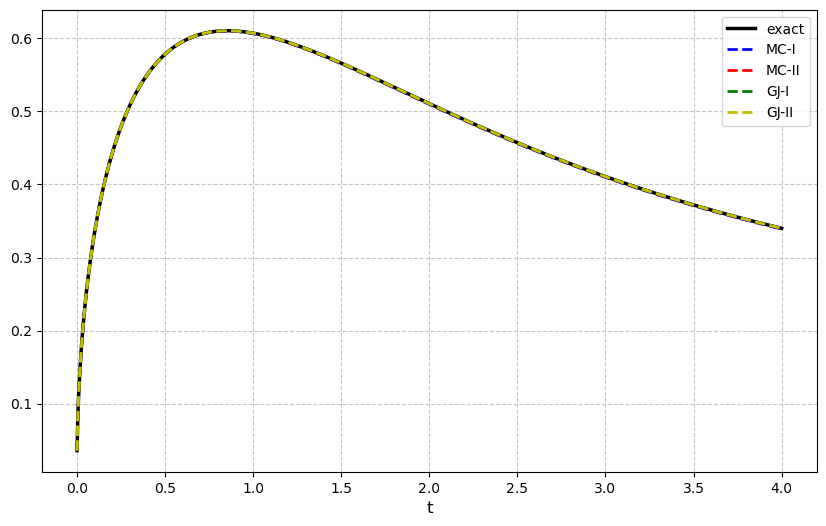

In [199]:
plt.figure(figsize=(10, 6))  # 增大图表尺寸
plt.plot(ts, dfal, linewidth=2.5, label='exact', color='black')  # 加粗exact线条并使用黑色
plt.plot(ts, MCI, 'b--', linewidth=2, label='MC-I')  # 增加其他线条宽度
plt.plot(ts, MCII, 'r--', linewidth=2, label='MC-II')
plt.plot(ts, GJI, 'g--', linewidth=2, label='GJ-I')
plt.plot(ts, GJII, 'y--', linewidth=2, label='GJ-II')
plt.xlabel(r't', fontsize=12)  # 增大标签字体
plt.legend(fontsize=10)  # 增大图例字体
plt.grid(True, linestyle='--', alpha=0.7)  # 使网格线更细致
# plt.xlim(1.0, 2.0)
plt.box(True)
plt.show()

## exact solution for EG1

In [ ]:
from scipy.stats import beta
import scipy.special as sp
import numpy as np
from pymittagleffler import mittag_leffler
from scipy.special import roots_jacobi
import matplotlib.pyplot as plt

In [ ]:
def mitlef(al,beta, t):
    return np.real(mittag_leffler(t, al, beta))

In [64]:
t=np.linspace(0,5.0,100)
x=np.linspace(0,1,100)
al=1.5
lam = 1.0

In [65]:
tt, xx = np.meshgrid(t, x)

In [66]:
ut = mitlef(al,1,-lam*tt**al)-1*tt*mitlef(al,2,-lam*tt**al)

In [67]:
ux = np.sin(np.pi*xx)

In [68]:
U = ut*ux

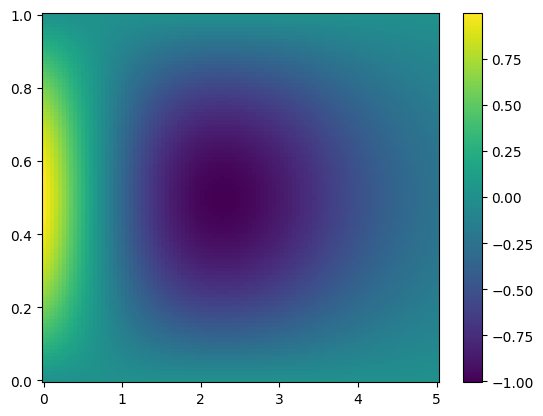

In [69]:
plt.pcolormesh(tt, xx, U)
plt.colorbar()